# Satellite Image Processing and Analysis in the Big Data Era (SIPADBE) 2023

This is an example code, introducing two environments (i.e., TensorFlow and PyTorch) for running deep learning codes on GPU. Moreover, it is intdented to check that you have the right python packages/setup for the course.

Before that, let's talk about how to open this jupyter notebook. [Jupter](https://jupyter.org/) notebook will be the main working environment through out this course.

1. Open command prompt
2. Enter ```mamba activate tf```, to activate the right python environment
3. Enter ```jupyter notebook```, to open jupyter notebook as you see here.

## Testing [TensorFlow](https://www.tensorflow.org/?gad=1&gclid=CjwKCAjwov6hBhBsEiwAvrvN6IebqKPk8JWr1YHar9X-h_exija938j1NlCOyxazKMlvRXoXhCKU-BoCmJQQAvD_BwE) environment

Here, we showcase how to classify hand-written digits using deep learning. These are the main steps:

1. Load dataset
2. Set model parameters and network structure
3. Train the model
4. Visulize accuracy assessment
5. Model prediction

reference: https://github.com/AppliedMachineLearningNBI/AppliedML2021

### Load libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD

### Load datasets

In [2]:
# load MNIST dataset to the location "~/keras/mnist.npz"
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

### Define network structure

In [3]:
# set up the network hyperparameters
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
batch_norm_momentum = 0.9
learning_rate = 0.001
init = tf.keras.initializers.VarianceScaling(scale=1.0, mode='fan_in')
centropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# network structure
nn_reg = tf.keras.models.Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(n_hidden1, activation='elu', kernel_initializer=init),
  BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True),
  Dense(n_hidden2, activation='elu', kernel_initializer=init),
  BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True),
  Dense(n_outputs, activation='elu', kernel_initializer=init),
  BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True)
])

nn_reg.compile(loss=centropy, optimizer=SGD(learning_rate), metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Define additional parameters

In [4]:
n_epochs = 3
batch_size = 200

### Train a model

In [5]:
history = nn_reg.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 1s 22us/sample - loss: 1.3844 - acc: 0.5898 - val_loss: 0.9305 - val_acc: 0.7872
Epoch 2/3
60000/60000 [==============================] - 1s 16us/sample - loss: 0.8892 - acc: 0.8061 - val_loss: 0.7714 - val_acc: 0.8465
Epoch 3/3
60000/60000 [==============================] - 1s 17us/sample - loss: 0.7808 - acc: 0.8456 - val_loss: 0.6997 - val_acc: 0.8703


### Visualize the accuracy

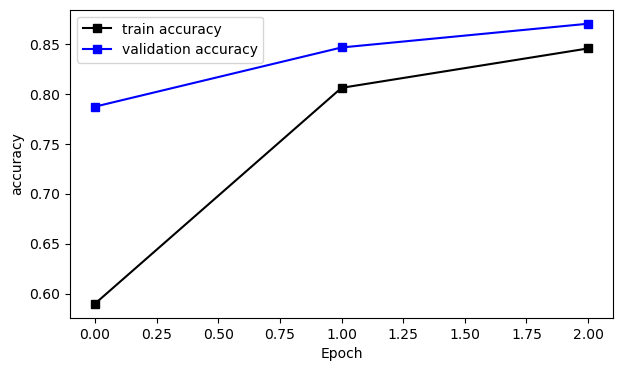

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, figsize=(7, 4))
ax.plot(np.arange(n_epochs), history.history['acc'], 'ks-', label='train accuracy')
ax.plot(np.arange(n_epochs), history.history['val_acc'], 'bs-', label='validation accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('Epoch')
ax.legend()
plt.show()

### Check the predictions

<Figure size 1000x1000 with 0 Axes>

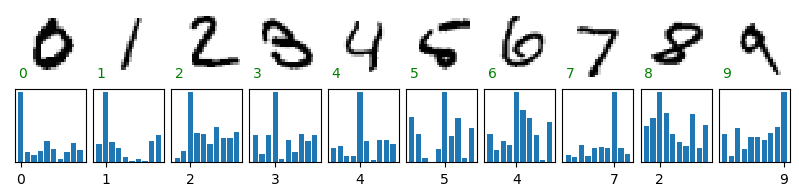

In [7]:
# here we take 10 digits from validation set and see network predictions for them
preds = nn_reg.predict(X_val)
n_digits = len(np.unique(y_val))
n = X_val.shape[-1]

plt.figure(figsize=(10,10))
fig, axes = plt.subplots(2, n_digits, figsize=(10, 2),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# get digits from validation set in ascending order
n_images = 2 # image of a digit & weighting
#images = np.zeros([n_images * n_digits, n * n])
for i in range(n_digits):
    img =  X_val[np.where(y_val == i)][0].reshape(-1)
    loc = np.where(y_val == i)[0][0]
    img_wht = preds[loc]
    axes[0][i].imshow(img.reshape(n, n), cmap='binary', interpolation='nearest')
    axes[1][i].bar(range(10), np.abs(img_wht))
    axes[0][i].axis("off")
    axes[0][i].text(0.05, 0.05, i, transform=axes[0][i].transAxes, 
                    color='green')
    axes[1][i].set_xticks([np.argmax(img_wht)])

## Test PyTorch environment

Now, we move to the test of [PyTorch](https://pytorch.org/) environment, using a similar example.

Reference: 

https://blog.paperspace.com/training-validation-and-accuracy-in-pytorch/
 
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

### Load python libraries

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torchvision
from tqdm import tqdm

### Core functions for training, evaluating, and reporting accuracy

In [9]:
def train(network, training_set, batch_size, optimizer, loss_function):
    """
    This function optimizes the convnet weights
    """
    #  creating list to hold loss per batch
    loss_per_batch = []

    #  defining dataloader
    train_loader = DataLoader(training_set, batch_size)

    #  iterating through batches
    print('training...')
    for images, labels in tqdm(train_loader):
        #---------------------------
        #  sending images to device
        #---------------------------
        images, labels = images.to(device), labels.to(device)

        #-----------------------------
        #  zeroing optimizer gradients
        #-----------------------------
        optimizer.zero_grad()

        #-----------------------
        #  classifying instances
        #-----------------------
        classifications = network(images)

        #---------------------------------------------------
        #  computing loss/how wrong our classifications are
        #---------------------------------------------------
        loss = loss_function(classifications, labels)
        loss_per_batch.append(loss.item())

        #------------------------------------------------------------
        #  computing gradients/the direction that fits our objective
        #------------------------------------------------------------
        loss.backward()

        #---------------------------------------------------
        #  optimizing weights/slightly adjusting parameters
        #---------------------------------------------------
        optimizer.step()
    print('all done!')

    return loss_per_batch

In [10]:
def validate(network, validation_set, batch_size, loss_function):
    """
    This function validates convnet parameter optimizations
    """
    #  creating a list to hold loss per batch
    loss_per_batch = []

    #  defining model state
    network.eval()

    #  defining dataloader
    val_loader = DataLoader(validation_set, batch_size)

    print('validating...')
    #  preventing gradient calculations since we will not be optimizing
    with torch.no_grad():
        #  iterating through batches
        for images, labels in tqdm(val_loader):
            #--------------------------------------
            #  sending images and labels to device
            #--------------------------------------
            images, labels = images.to(device), labels.to(device)

            #--------------------------
            #  making classsifications
            #--------------------------
            classifications = network(images)

            #-----------------
            #  computing loss
            #-----------------
            loss = loss_function(classifications, labels)
            loss_per_batch.append(loss.item())

    print('all done!')

    return loss_per_batch

In [11]:
def accuracy(network, dataset):
    """
    This function computes accuracy
    """
    #  setting model state
    network.eval()

    #  instantiating counters
    total_correct = 0
    total_instances = 0

    #  creating dataloader
    dataloader = DataLoader(dataset, 64)

    #  iterating through batches
    with torch.no_grad():
        for images, labels in tqdm(dataloader):
            images, labels = images.to(device), labels.to(device)

            #-------------------------------------------------------------------------
            #  making classifications and deriving indices of maximum value via argmax
            #-------------------------------------------------------------------------
            classifications = torch.argmax(network(images), dim=1)

            #--------------------------------------------------
            #  comparing indicies of maximum values and labels
            #--------------------------------------------------
            correct_predictions = sum(classifications==labels).item()

            #------------------------
            #  incrementing counters
            #------------------------
            total_correct+=correct_predictions
            total_instances+=len(images)
    return round(total_correct/total_instances, 3)

### Main parameters

In [12]:
n_epochs = 10  
batch_size = 1000 

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')  # This time run on GPU

### Load datasets

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = CIFAR10('./data', download=True, transform=transform, train=True)
validation_set = CIFAR10(root='./data', download=True, transform=transform, train=False)

Files already downloaded and verified
Files already downloaded and verified


### See some examples of the datasets

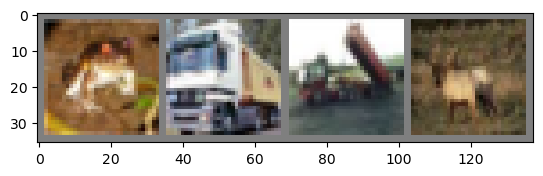

frog  truck truck deer 


In [15]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(DataLoader(train_set, 4))
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

### Define network structure

In [16]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Define optimizer

In [17]:
optimizer = torch.optim.Adam(net.parameters(), lr=3e-4)

### Define loss function

In [18]:
loss_function=nn.CrossEntropyLoss()

### Train and evaluate models

In [19]:
#  training/optimizing parameters
training_losses = train(network=net, training_set=train_set, 
                        batch_size=batch_size, optimizer=optimizer, 
                        loss_function=loss_function)
                        
#  validating optimizations                        
validation_losses = validate(network=net, validation_set=validation_set, 
                             batch_size=batch_size, loss_function=loss_function)

#  deriving model accuracy on the traininig set
training_accuracy = accuracy(net, train_set)
print(f'training accuracy: {training_accuracy}')

#  deriving model accuracy on the validation set
validation_accuracy = accuracy(net, validation_set)
print(f'validation accuracy: {validation_accuracy}')

training...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:12<00:00,  3.95it/s]


all done!
validating...


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.74it/s]


all done!


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [00:11<00:00, 70.08it/s]


training accuracy: 0.248


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 72.07it/s]

validation accuracy: 0.251
